<img src="img/MoMA.jpg" style="width: 600px;"/>

***
# SQL Exercise - Museum of Modern Art

**As a way of practising my SQL skills I download the dataset provided by the [MoMA](https://github.com/MuseumofModernArt/collection). The dataset has 2 tables Artists & Artworks**

According to the github repository with the data: 
<br>

> _"This research dataset contains 138,210 records, representing all of the works that have been accessioned into MoMA’s collection and cataloged in our database. It includes basic metadata for each work, including title, artist, date made, medium, dimensions, and date acquired by the Museum. Some of these records have incomplete information and are noted as “not Curator Approved.”_

> *The Artists dataset contains 15,388 records, representing all the artists who have work in MoMA's collection and have been cataloged in our database. It includes basic metadata for each artist, including name, nationality, gender, birth year, death year, Wiki QID, and Getty ULAN ID."*

**I will be using PostgreSQL**

There is another notebook where I explain how I created the tables. In this notebook I only want to focus on the SQL queries.

***
<br>

## LET'S START! 

**psycopg2** is a Python library to connect to PostgreSQL. For this exercise I will use this library and some other ones that can be seen below. The main code to use Python and and PostgreSQL comes from psycopg2 [official website](https://www.psycopg.org/docs/index.html) and Mr. Fugus' [GitHub](https://github.com/MrFuguDataScience/SendDataFrom-R-Python-to-SQL-PSQL-Mongo/blob/master/HOW%20TO%20SEND%20DATA%20from%20Python%20to%20PSQL.ipynb)

In [846]:
import pandas as pd
import matplotlib.pyplot as plt
from config import config

import psycopg2
import psycopg2.extras
import pandas.io.sql as sqlio

***
### Connecting to the Database

This next command helps us connect to the database we have created. It is necessary to edit the "database.ini" file in this repository with the information from your dataset. Concretely `host=*** / database=*** / user=*** / password=***`

In [447]:
# Establish a connection to the database by creating a cursor object

# Get the config params
params = config()

# Connect to the Postgres_DB:
conn = psycopg2.connect(**params)

# Create new_cursor allowing us to write Python to execute PSQL:
cur = conn.cursor()
conn.autocommit = True  

**NOTE:** Remember it is important to close the connection at the end

***
<br>

## Querying

I will start by practicing simple queries and then move to more complex queries (I will use a self-made ranking from level 1 to 5). The commands used here are not supposed to be a comprehensive list.  I will be adding some images of the artwork and artists in the MoMA dataset to make it more engaging.

<div class="span5 alert alert-info">
Level 1: SELECT / FROM / COUNT / LIMIT / DISTINCT / WHERE / AND / BETWEEEN / IN / NULL or NOT NULL / LIKE or NOT LIKE<br>
Level 2: Aggregate Functions (AVG, SUM, MIN, MAX) / ROUND / Aliases / ORDER BY / GROUP BY / HAVING <br>
Level 3: JOIN, Arithmetic, CASE statements, COALESCE, OFFSET<br>
Level 4: Nested queries, CTEs, LENGTH, CUBE, UPDATE, SET, RETURNING<br>
Level 5: Window functions (OVER, PARTITION), Random number of rows, Datatypes
</div>

### Level 1: 

**Hint:** In this section I will practice the following commands:<br> 
`SELECT / FROM / COUNT / LIMIT / DISTINCT / WHERE / AND / BETWEEEN / IN / NULL or NOT NULL / LIKE or NOT LIKE`
<br>
<br>

<font color='blue'>Question 1: How many rows are there in the artists table?</font> 

There are several ways to query using psycopg2 this is one, however, the next questions use another method which makes the results more readable

In [142]:
query = "SELECT COUNT(*) FROM artists"
cur.execute(query)
cur.fetchone() # When doing a SELECT query use: fetchone(), fetchall() or fetchmany() methods

(15388,)

<br>
<font color='blue'>Question 2: Who are the first 5 people in the artists table? (show all the columns)</font> 

In [10]:
query = """
SELECT * 
FROM artists 
LIMIT 5

"""

df = sqlio.read_sql_query(query, conn)
df # I will be using the following type of structure for the queries, I find pandas dataframes more elegant and easier to read

,constituentid,displayname,artistbio,nationality,gender,begindate,enddate,wiki_qid,ulan
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,None,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,None,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,None,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,None,NaN


>  <img src="img/Doroteo Arnaiz.jpg" alt="Doroteo Arnaiz" title="Doroteo" style="width: 400px;"/>
<br>
> <b>Doroteo Arnáiz (painter)</b> / source: La Voz de Galicia

<br>
<font color='blue'>Question 3: How many different nationalities are there?</font> 

In [23]:
query = """
SELECT COUNT(DISTINCT nationality)
FROM artists 
LIMIT 5
"""

df = sqlio.read_sql_query(query, conn)
df

,count
0,119


<br>
<font color='blue'>Question 4: Who are the Spanish artists in the dataset? (show only the displayname column)</font> 

In [29]:
query = """
SELECT displayname
FROM artists 
WHERE nationality = 'Spanish'
"""

df = sqlio.read_sql_query(query, conn)
df

,displayname
0,Doroteo Arnaiz
1,Cristobal Arteche
2,Mariano Andreù
3,Manuel Angeles Ortiz
4,Miquel Barcelo
...,...
156,Albert Serra
157,Aurèlia Muñoz
158,José Rafael Moneo
159,Closca Design S.L.


>  <img src="img/Palmira Puig.jpg" style="width: 300px;"/>
<br>
> <b>Palmira Puig Giró (photographer)</b> / source: Marcel Giró Website

<br>
<font color='blue'>Question 6: Who are the Georgian artists born before 1950? (show displayname and begindate)</font> 

In [46]:
query = """
SELECT displayname, begindate
FROM artists 
WHERE nationality = 'Georgian' AND begindate < 1950
"""

df = sqlio.read_sql_query(query, conn)
df

,displayname,begindate
0,Iraklii Gamrekeli,1894
1,Lado Gudiashvili,1896
2,Lana Gogoberidze,1928


>  <img src="img/Irakli Gamrekeli.jpg" style="width: 300px;"/>
<br>
> <b>Irakli Gamrekeli (Set Designer)</b> / source: Wikipedia

<br>
<font color='blue'>Question 7: What artists where born during the second world war in Poland? Show the first 3 entries and only the displayname and begindate columns</font> 

In [448]:
query = """
SELECT displayname, begindate
FROM artists 
WHERE nationality = 'Polish' AND begindate BETWEEN 1939 AND 1945
LIMIT 3
"""

df = sqlio.read_sql_query(query, conn)
df

,displayname,begindate
0,Adam Bujak,1940
1,Mieczysław Górowski,1941
2,Rafal Olbinski,1945


>  <img src="img/Mieczysław Górowski.jpg" style="width: 400px;"/>
<br>
> <b>Mieczysław Górowski (Graphic Artist)</b> / source: Pigasus Polish Poster Shop

<br>
<font color='blue'>Question 8: What Russian artist does not have a birthdate (begindate) but has a wiki_qid entry? Show the name, wiki_qid, and begindate</font>

In [51]:
query = """
SELECT displayname, wiki_qid, begindate
FROM artists 
WHERE nationality = 'Russian' AND wiki_qid IS NOT NULL AND begindate = 0
"""

df = sqlio.read_sql_query(query, conn)
df

,displayname,wiki_qid,begindate
0,Vera Ermolaeva,Q1744626,0


>  <img src="img/Vera Ermolaeva.jpg" style="width: 200px;"/>
<br>
> <b>Vera Ermolaeva (Painter)</b> / source: Wikipedia
<br>
> <b>She was actually born in 1893

<br>
<font color='blue'>Question 9: Check if the MoMA has in record the american artist "Bob Ross" (or Robert Ross) </font>

In [94]:
query = """
SELECT *
FROM artists 
WHERE displayname ILIKE 'Bob Ross' OR displayname ILIKE 'Robert Ross';
"""

df = sqlio.read_sql_query(query, conn)
df

,constituentid,displayname,artistbio,nationality,gender,begindate,enddate,wiki_qid,ulan


**Response**: Unfortunately they don't! A note on this query. You could actually use _"WHERE displayname ILIKE ANY (array['Bob Ross', 'Robert Ross'])"_ and keep adding conditions, you could also use the wildcard %Ross% but in this case it returns many artists. ILIKE, in comparison with LIKE does not care about upper and lower case letters

>  <img src="img/Bob Ross.jpg" style="width: 400px;"/>
<br>
> <b>Bob Ross (Painter)</b> / source: FiveThrityEight

<br>
<font color='blue'>Question 10: Find the artists whose nationality is in the following list: 'Burkinabe', 'Persian', 'Coptic', 'Ugandan', 'Sahrawi' (show their name and nationality only)</font>

In [109]:
query = """
SELECT displayname, nationality
FROM artists 
WHERE nationality IN ('Burkinabe', 'Persian', 'Coptic', 'Ugandan', 'Sahrawi')
"""

df = sqlio.read_sql_query(query, conn)
df

,displayname,nationality
0,Kanuge John Bosco,Ugandan
1,National Union of Sahrawi Women,Sahrawi
2,Unknown designer,Coptic
3,Unknown designer,Persian
4,Sanlé Sory,Burkinabe


>  <img src="img/Sanlé Sory.jpg" style="width: 200px;"/>
<br>
> <b>Sanlé Sory (Photographer)</b> / source: sorysanle.com

<br>
<br>

### LEVEL 2:

**Hint:** In this section I will use aggregate functions like `COUNT` (which I have already used) and other functions including `AVG, SUM, MIN and MAX`, also I will use `ROUND / Aliases / ORDER BY / GROUP BY / HAVING`

<br>
<font color='blue'>Question 11: Give the number to how many entries have a null "wiki_qid" (NULL value), give your column the name "Null Wiki"</font>

In [121]:
query = """
SELECT COUNT(*) AS "Null Wiki"
FROM artists 
WHERE wiki_qid IS NULL
"""

df = sqlio.read_sql_query(query, conn)
df

,Null Wiki
0,12124


<br>
<font color='blue'>Question 12: Determine the average birth year of all the artists. Watch out, there are some empty values (begindate=0), you will need to get rid of. Finally, do not give decimals for this exercise</font>

In [130]:
query = """
SELECT ROUND(AVG(begindate)) AS "Average Birth Year"
FROM artists 
WHERE begindate != 0
"""

df = sqlio.read_sql_query(query, conn)
df

,Average Birth Year
0,1931.0


<br>
<font color='blue'>Question 13: Which is the first recorded death (enddate)? (filter out the 0s and return the whole row). <br>Hint: even if MIN() seems like the best idea another command could be better for this purpose</font>

In [180]:
query = """
SELECT *
FROM artists
WHERE enddate != 0
ORDER BY enddate
LIMIT 1
"""

df = sqlio.read_sql_query(query, conn)
df

,constituentid,displayname,artistbio,nationality,gender,begindate,enddate,wiki_qid,ulan
0,6278,Josiah Wedgwood,"British, 1730–1795",British,Male,1730,1795,Q319331,500062605


>  <img src="img/Josiah Wedgwood.jpg" style="width: 200px;"/>
<br>
> <b>Josiah Wedgwood (Potter)</b> / source: wikipedia.com

<br>
<font color='blue'>Question 14: Find the top 10 most represented nationalities in the artists dataset (don't filter out the artists that do not have any assigned nationality)</font>

In [225]:
query = """
SELECT nationality, COUNT(*)
FROM artists
GROUP BY nationality
ORDER BY COUNT(*) DESC
LIMIT 10
"""

df = sqlio.read_sql_query(query, conn)
df

,nationality,count
0,American,5287
1,None,2465
2,German,972
3,British,863
4,French,857
5,Italian,544
6,Japanese,510
7,Swiss,295
8,Dutch,278
9,Russian,268


<br>
<font color='blue'>Question 15: Do the same as before but select only the female artists (show the nationality, gender, and count columns)</font>

In [240]:
query = """
SELECT nationality, gender, COUNT(*)
FROM artists
GROUP BY nationality, gender
HAVING gender = 'Female'
ORDER BY COUNT(*) DESC
LIMIT 10
"""

df = sqlio.read_sql_query(query, conn)
df

,nationality,gender,count
0,American,Female,1115
1,None,Female,169
2,German,Female,149
3,British,Female,113
4,French,Female,71
5,Japanese,Female,58
6,Austrian,Female,43
7,Italian,Female,42
8,Brazilian,Female,41
9,Canadian,Female,40


<br>
<font color='blue'>Question 16: Return 4 columns the first recorded birth as "First Birth", the last recorded birth as "Last Birth", the first recorded death as "First Death" and the last recorded death as "Last Death"</font>

In [228]:
query = """
SELECT MIN(begindate) AS "First Birth", MAX(begindate) AS "Last Birth",
       MIN(enddate) AS "First Death", MAX(enddate) AS "Last Death" 
FROM artists
WHERE begindate != 0 AND enddate != 0 

"""

df = sqlio.read_sql_query(query, conn)
df

,First Birth,Last Birth,First Death,Last Death
0,1730,1992,1795,2020


<br>
<br>

### LEVEL 3: JOIN, Arithmetic, CASE statements

**Hint:** These are some of the commands I will use in this section: `JOIN, Arithmetic, CASE , COALESCE, OFFSET` 
<br>

**Note:** there is another dataset called artworks. We will use JOIN to put the "Artists" table with the "Artworks" table. Here is some information about the columns of the artworks table. Note that there are some repeated columns from the artists dataset, the reason is that for some artworks there are several artists attributed to them.

In [450]:
query = """
SELECT *
  FROM information_schema.columns
 WHERE table_name   = 'artworks'
"""

df = sqlio.read_sql_query(query, conn)
df

,table_catalog,table_schema,table_name,column_name,ordinal_position,column_default,is_nullable,data_type,character_maximum_length,character_octet_length,...,is_identity,identity_generation,identity_start,identity_increment,identity_maximum,identity_minimum,identity_cycle,is_generated,generation_expression,is_updatable
0,moma,public,artworks,title,1,None,YES,character varying,5000.0,20000.0,...,NO,None,None,None,None,None,NO,NEVER,None,YES
1,moma,public,artworks,artist,2,None,YES,character varying,5000.0,20000.0,...,NO,None,None,None,None,None,NO,NEVER,None,YES
2,moma,public,artworks,constituentid,3,None,YES,character varying,5000.0,20000.0,...,NO,None,None,None,None,None,NO,NEVER,None,YES
3,moma,public,artworks,artistbio,4,None,YES,character varying,5000.0,20000.0,...,NO,None,None,None,None,None,NO,NEVER,None,YES
4,moma,public,artworks,nationality,5,None,YES,character varying,5000.0,20000.0,...,NO,None,None,None,None,None,NO,NEVER,None,YES
5,moma,public,artworks,begindate,6,None,YES,character varying,5000.0,20000.0,...,NO,None,None,None,None,None,NO,NEVER,None,YES
6,moma,public,artworks,enddate,7,None,YES,character varying,5000.0,20000.0,...,NO,None,None,None,None,None,NO,NEVER,None,YES
7,moma,public,artworks,gender,8,None,YES,character varying,5000.0,20000.0,...,NO,None,None,None,None,None,NO,NEVER,None,YES
8,moma,public,artworks,date,9,None,YES,character varying,5000.0,20000.0,...,NO,None,None,None,None,None,NO,NEVER,None,YES
9,moma,public,artworks,medium,10,None,YES,character varying,5000.0,20000.0,...,NO,None,None,None,None,None,NO,NEVER,None,YES



<br>
<font color='blue'>Question 17: Start by trying to join the "Artists" and the "Artworks" tables. You will get an error. Then look at the first 10 different values of the "constituentid" column. Why do you think you are having trouble joining both tables?</font>

In [266]:
query = """
SELECT title
FROM artworks
INNER JOIN artists ON artworks.constituentid = artists.constituentid
"""

# This will query will return an error. See below why this happens.

df = sqlio.read_sql_query(query, conn)
df

If we check the first 10 entries of the "constituentid" column we will see the problem

In [272]:
query = """
SELECT DISTINCT(constituentid)
FROM artworks
LIMIT 10
"""

df = sqlio.read_sql_query(query, conn)
df

,constituentid
0,12533
1,48181
2,2571
3,34884
4,247
5,"8200, 6815"
6,47891
7,2275
8,40442
9,42722


**Response:** When you try to joining the two datasets, it returns an error. This is due to both columns on which we want to join have different data types. The artists constituentid column is an integer with unique values, the artworks data set constituentid has a character_varying data type (as can be seen in the table information provided above). The underlying reason is what we mentioned: the artworks dataset puts together different artists who have contributed to the same artwork. This makes it impossible to join on this column.

The dataset "artworks_edit" (in the data folder of this repository) has unpacked the constituentID column into several columns. Use that dataset instead of "artworks". See how many entries there are now.

In [396]:
query = """
SELECT COUNT(*)
FROM artworks_edit
"""

df = sqlio.read_sql_query(query, conn)
df

,count
0,153917


As it can be seen, the total number of entries is much higher now. This is because we have created a new line for each artist's work. From a point of view of data structuring this is not a good idea because we have many duplicate rows. **Having redundant data in your dataset is not good according to experts but this new structure will allow us to practice JOINS**. Try it now: Join both the "artists" and the "artworks_edit" into one table and show the first 5 entries.

In [274]:
query = """
SELECT *
FROM artworks_edit
INNER JOIN artists ON artworks_edit.artistID = artists.constituentid
LIMIT 5
"""

df = sqlio.read_sql_query(query, conn)
df


,objectid,artistid,title,all_artists,all_ids,all_bios,all_nationalities,all_begindates,all_enddates,all_genders,...,duration_sec,constituentid,displayname,artistbio,nationality,gender,begindate,enddate,wiki_qid,ulan
0,2,6210,Ferdidsbrücke Project / Vienna / Austria (Elev...,Otto Wagner,6210,(Austrian / 1841–1918),(Austrian),(1841),(1918),(Male),...,None,6210,Otto Wagner,"Austrian, 1841–1918",Austrian,Male,1841,1918,Q84287,500016971
1,3,7470,City of Music / National Superior Conservatory...,Christian de Portzamparc,7470,(French / born 1944),(French),(1944),(0),(Male),...,None,7470,Christian de Portzamparc,"French, born 1944",French,Male,1944,0,Q312838,500024982
2,4,7605,Villa near Vienna Project / Outside Vienna / A...,Emil Hoppe,7605,(Austrian / 1876–1957),(Austrian),(1876),(1957),(Male),...,None,7605,Emil Hoppe,"Austrian, 1876–1957",Austrian,Male,1876,1957,Q1336246,500232997
3,5,7056,The Manhattan Transcripts Project / New York /...,Bernard Tschumi,7056,(French and Swiss / born Switzerland 1944),(),(1944),(0),(Male),...,None,7056,Bernard Tschumi,"French and Swiss, born Switzerland 1944",None,Male,1944,0,Q123966,500022322
4,6,7605,Villa / project / outside Vienna / Austria / E...,Emil Hoppe,7605,(Austrian / 1876–1957),(Austrian),(1876),(1957),(Male),...,None,7605,Emil Hoppe,"Austrian, 1876–1957",Austrian,Male,1876,1957,Q1336246,500232997



<br>
<font color='blue'>Question 18: With this new dataset, who is the artist who has had more artwork held at the MoMA? (show the name and the number of art pieces)</font>

In [301]:
query = """
SELECT displayname, COUNT (artistid) AS num
FROM artworks_edit
INNER JOIN artists ON artworks_edit.artistID = artists.constituentid
GROUP BY displayname
ORDER BY num DESC
LIMIT 1
"""

df = sqlio.read_sql_query(query, conn)
df


,displayname,num
0,Eugène Atget,5050


>  <img src="img/Eugène Atget.jpg" style="width: 200px;"/>
<br>
> <b>Eugène Atget (Photographer)</b> / source: wikipedia.com

<br>
<font color='blue'>Question 19: There have been an average of 10 artworks per artist in the MoMA. Create 4 categories for the number of artwork each artist has had in the MoMA. An example could be:
<br>a) Far above average >= 500
<br>b) 50 < = Above average < 500
<br>c) 5 < = Average < 50
<br>d) 1 < = Under Average < 5
<br>You can order them by number of artworks descending and show the 100 first entries.
</font>

In [315]:
query = """
SELECT displayname AS artist, COUNT (artistid) AS num,
        CASE WHEN COUNT(artistid) >= 500 THEN 'Far above average'
            WHEN COUNT(artistid) BETWEEN 50 AND 499 THEN 'Above average' 
            WHEN COUNT(artistid) BETWEEN 5 AND 49 THEN 'Average'             
            ELSE 'Under Average'
        END AS label
FROM artworks_edit
INNER JOIN artists ON artworks_edit.artistID = artists.constituentid
GROUP BY displayname
ORDER BY num DESC
LIMIT 100
"""

df = sqlio.read_sql_query(query, conn)
df

,artist,num,label
0,Eugène Atget,5050,Far above average
1,Louise Bourgeois,3381,Far above average
2,Unknown photographer,2896,Far above average
3,Ludwig Mies van der Rohe,2682,Far above average
4,Jean Dubuffet,1436,Far above average
...,...,...,...
95,Javier Sánchez Gómez,201,Above average
96,Flora Manteola,201,Above average
97,Unknown Artists,201,Above average
98,Frans Masereel,201,Above average


<br>
<font color='blue'>Question 20: There are 6 columns of measurements depth_cm, diameter_cm, height_cm, length_cm, weight_kg, width_cm. Use the original "artworks" table to show in one row the amount of missing values for each of these columns mentioned above.
</font>

In [410]:
query = """
SELECT COUNT(*) - COUNT(depth_cm) AS depth, 
        COUNT(*) - COUNT(diameter_cm) AS diameter, 
        COUNT(*) - COUNT(height_cm) AS height, 
        COUNT(*) - COUNT(length_cm) AS length, 
        COUNT(*) - COUNT(weight_kg) AS weight,
        COUNT(*) - COUNT(width_cm) As width
FROM artworks
"""

df = sqlio.read_sql_query(query, conn)
df

,depth,diameter,height,length,weight,width
0,124418,136742,18346,137469,137921,19268


**Extra:** Calculate the correlation between height and width.

In [969]:
query = """
SELECT corr(height_cm,width_cm)
FROM artworks
"""

df = sqlio.read_sql_query(query, conn)
df

,corr
0,0.41059


<br>
<font color='blue'>Question 21: Get the title, all the artists names (all_artists), date, height_cm, width_cm, and create a new column called "size" which will be height_cm * width_cm, order them by the largest in terms of size in descending order and show the 10 first values. Watch out for the null values!
</font>

In [419]:
query = """
SELECT title, artist ,date, height_cm, width_cm, (height_cm * width_cm) AS size
FROM artworks
WHERE height_cm IS NOT NULL AND width_cm IS NOT NULL
ORDER BY size DESC
LIMIT 10
"""

df = sqlio.read_sql_query(query, conn)
df

,title,artist,date,height_cm,width_cm,size
0,Untitled,James Lee Byars,1962–64,1097.300000,9144.000000,1.003371e+07
1,"Untitled (Havana, 2000)",Tania Bruguera,2000,5000.000000,1200.000000,6.000000e+06
2,To Lift,Richard Serra,1967,9140.000000,200.000000,1.828000e+06
3,Rhapsody,Jennifer Bartlett,1975-76,228.600500,4663.449300,1.066067e+06
4,Lovers,Teiji Furuhashi,1994,1000.800000,1000.800000,1.001601e+06
5,Just a bit more,Ranjani Shettar,2005-06,1097.282195,731.521463,8.026855e+05
6,F-111,James Rosenquist,1964-65,304.800000,2621.300000,7.989722e+05
7,Sculpture for a Large Wall,Ellsworth Kelly,1956-57,348.000000,1993.900000,6.938772e+05
8,Intersection II,Richard Serra,1992-93,400.000000,1700.200000,6.800800e+05
9,Switch,Richard Serra,1999,411.500000,1584.963200,6.522124e+05


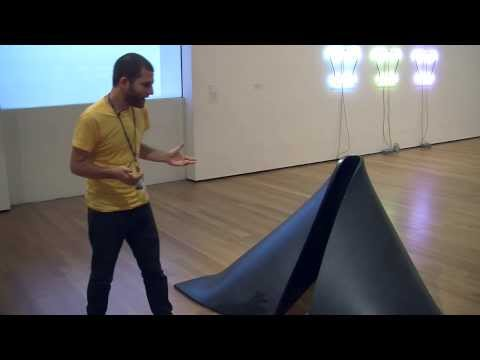

In [388]:
# Here is a video from the third result

from IPython.display import YouTubeVideo

YouTubeVideo('u4m5mGw4PaM', width=600, height=300)

<br>
<font color='blue'>Question 22: As we saw in a previous question, there are some empty values in terms of height, width, and length. Create a query that multiplies these three values in a new column. If one of the three values is NULL the systems will return "none" but we want to avoid this, we want to show whatever size is available even if one or two of the values are none. For example: "if only height is available, the column will return "height" alone, if only "height" and "length" are available it will return the multiplication of these two columns. Return the three measurements, the new column "size" and the title of the artwork. Show the 5 smallest objects that are bigger than 0.
</font>

**Heads up:** This ended up being a bit more difficult than I expected, my intention was to do an gentle introduction to COALESCE but I ended up having to dig deeper into how it works and combine it with a CTE (Common Table Expression). If some one is trying this out maybe they can skip this one and come back later.

In [569]:
query = """
WITH query AS (SELECT title, height_cm, length_cm, width_cm, 
        (CASE WHEN height_cm IS NULL AND length_cm IS NULL AND width_cm IS NULL
        THEN 0
        ELSE (COALESCE(height_cm, 1) * COALESCE(length_cm, 1) * COALESCE(width_cm, 1))
        END) AS size
        FROM artworks)
        
SELECT *
FROM query
WHERE size > 0
ORDER BY size ASC
LIMIT 5
"""

df = sqlio.read_sql_query(query, conn)
df

,title,height_cm,length_cm,width_cm,size
0,Parkett no. 4,0.2000,None,NaN,0.2000
1,Ant from Stains,0.6000,None,0.5,0.3000
2,Arrangement of Letters,0.3000,None,NaN,0.3000
3,"Aspirin® Tablet, 500 mg.",0.3175,None,NaN,0.3175
4,In-text plate (page 43) from TAGEBÜCHER,0.3000,None,1.8,0.5400


>  <img src="img/Ant from Stains.jpg" style="width: 400px;"/>
<br>
> <b>Ant from stains</b> (by Edward Ruscha) / source: MoMA

<br>
<font color='blue'>Question 23: Multiply height, length, and width as size (filter out any row that has 0s and null values) and select ONLY 10th last smallest object (the result should not show the previous 9 smallest items)</font>

In [435]:
query = """
SELECT title, artist, height_cm, length_cm, width_cm, (height_cm * length_cm * width_cm) AS size
FROM artworks
WHERE height_cm IS NOT NULL AND height_cm != 0 AND
    length_cm IS NOT NULL AND length_cm != 0 AND
    width_cm IS NOT NULL AND width_cm != 0 
ORDER BY size ASC
LIMIT 1
OFFSET 9
"""

df = sqlio.read_sql_query(query, conn)
df

,title,artist,height_cm,length_cm,width_cm,size
0,Object Wrapped in Rope,George Maciunas,10.0,5.1,5.1,260.1


>  <img src="img/Object Wrapped in Rope.jpg" style="width: 400px;"/>
<br>
> <b>Object Wrapped in Rope</b> / source: MoMA

<br>
<br>

### LEVEL 4: 

**Hint** In this section I will deal with:<br>
`nested queries, CTEs, DISTINCT ON, LENGTH, CUBE, UPDATE, SET, RETURNING`

<br>
<font color='blue'>Question 24: In exercise 19 we created a group of labels for the number of published artworks, we added the values a bit randomly. Check the amount of observations there are for each of the four labels (Far above average, Above average, Average, Under Average). Use a nested query for this.</font>

In [477]:
query = """
SELECT label , COUNT(*)
FROM (SELECT displayname AS artist, COUNT (artistid) AS num,
            CASE WHEN COUNT(artistid) >= 500 THEN 'Far above average'
                WHEN COUNT(artistid) BETWEEN 50 AND 499 THEN 'Above average' 
                WHEN COUNT(artistid) BETWEEN 5 AND 49 THEN 'Average'             
                ELSE 'Under Average'
            END AS label
        FROM artworks_edit
        INNER JOIN artists ON artworks_edit.artistID = artists.constituentid
        GROUP BY displayname) AS rank   
GROUP BY label       
"""

df = sqlio.read_sql_query(query, conn)
df

,label,count
0,Above average,499
1,Far above average,27
2,Average,3066
3,Under Average,10557


<br>
<font color='blue'>Question 25: Return the title, artist name, and character length of the title from the artworks_edit table. Filter by the first 3 Australian artists in the artists table whose wiki_qid is not null. Only return those artworks that have a character length in the title bigger than 100 characters.</font>

In [508]:
query = """
SELECT title, all_artists, LENGTH(title) AS length
FROM artworks_edit
WHERE length(title) > 100 AND artistid IN (SELECT constituentid
                    FROM artists
                    WHERE wiki_qid IS NOT NULL AND nationality = 'Australian'
                    LIMIT 3)

"""

df = sqlio.read_sql_query(query, conn)
df

,title,all_artists,length
0,RETRACING THEIR STEPS IN TWILIGHT (in-text pla...,Richard Bosman,101


>  <img src="img/Retracing their steps in the twilight.jpg" style="width: 400px;"/>
<br>
> <b>Retracing their steps in the twilight</b> (by Richard Bosman) / source: MoMA

<br>
<font color='blue'>Question 26: In a previous question we checked the artworks_edit table to see who had the most number of recorded works at the MoMa. One of the top 10 was Pablo Picasso (see the table below). Check how many different groups of artists has Pablo Picasso worked with (including just working by himself). Use DISTINCT ON and a CTE.</font>

In [622]:
query = """
SELECT artistid, all_artists, count(*) AS num
FROM artworks_edit
GROUP BY artistid, all_artists
ORDER BY num DESC
LIMIT 10
"""

df = sqlio.read_sql_query(query, conn)
df

,artistid,all_artists,num
0,229.0,Eugène Atget,5050
1,710.0,Louise Bourgeois,3336
2,8595.0,Unknown photographer,2810
3,7166.0,Ludwig Mies van der Rohe,2643
4,1633.0,Jean Dubuffet,1435
5,2002.0,Lee Friedlander,1320
6,NaN,None,1315
7,4609.0,Pablo Picasso,1309
8,1055.0,Marc Chagall,1161
9,3832.0,Henri Matisse,1063


In [680]:
query = """
WITH cte as (SELECT DISTINCT ON (artistid) *
FROM artworks_edit
WHERE all_artists ILIKE '%Pablo Picasso%')

SELECT COUNT(*)
FROM cte
"""

df = sqlio.read_sql_query(query, conn)
df

,count
0,55


>  <img src="img/Pablo Picasso.jpg" style="width: 200px;"/>
<br>
> <b>Pablo Picasso</b> / source: Pablo Picasso

<br>
<font color='blue'>Question 27: JOIN the artworks_edit and artists table. Return a table with the nationality, gender, and count for those two categories in that order (first nationality and then gender), filter out those who have nationality and gender as NULL values. Order them alphabetically on nationality</font>

In [678]:
query = """
SELECT nationality, gender, COUNT(*)
FROM artworks_edit
INNER JOIN artists ON artworks_edit.artistID = artists.constituentid
GROUP BY CUBE (nationality, gender)
HAVING nationality IS NOT NULL AND gender IS NOT NULL
ORDER BY nationality
"""

df = sqlio.read_sql_query(query, conn)
df

,nationality,gender,count
0,Afghan,Female,1
1,Albanian,Male,25
2,Algerian,Female,1
3,Algerian,Male,15
4,American,Non-Binary,11
...,...,...,...
187,Vietnamese,Male,2
188,Welsh,Female,1
189,Yugoslav,Female,61
190,Yugoslav,Male,105


<br>
<font color='blue'>Question 28: Count the entries for each gender. You will see that there are duplicates for "Male" and "Female" because of the uppcase and lower case letters. Once you have detected it, correct the database by changing "male" to "Male" and "female" to "Female". Finally, return the first table to check the changes have been made corretly</font>

In [682]:
query = """
SELECT gender, COUNT(*)
FROM artworks_edit
INNER JOIN artists ON artworks_edit.artistID = artists.constituentid
GROUP BY gender
"""

df = sqlio.read_sql_query(query, conn)
df

,gender,count
0,Female,21423
1,Male,119639
2,Non-Binary,12
3,female,2
4,male,30
5,None,11496


In [683]:
query = """
UPDATE artists 
SET gender = 'Male'
WHERE gender = 'male'
RETURNING *
"""

df = sqlio.read_sql_query(query, conn)
df

,constituentid,displayname,artistbio,nationality,gender,begindate,enddate,wiki_qid,ulan
0,35353,José Resende,"Brazilian, born 1945",Brazilian,Male,1945,0,None,None
1,39642,Didier Vermeiren,"Belgian, born 1951",Belgian,Male,1951,0,None,None
2,41279,Fred Eversley,"American, born 1941",American,Male,1941,0,None,None
3,41310,Noah Purifoy,"American, 1917–2004",American,Male,1917,2004,None,None
4,43396,Gino Soggetti,"Italian, 1898–1990",Italian,Male,1898,1990,None,None
5,45581,Abe Frajndlich,"German, born 1946",German,Male,1946,0,None,None
6,47962,Kees Wagenaars,"Dutch, born 1961",Dutch,Male,1961,0,None,None
7,48294,Rodney McMillian,"American, born 1969",American,Male,1969,0,None,None
8,48471,Cameron Rowland,"American, born 1988",American,Male,1988,0,None,None
9,49061,Kim Beom,"Korean, born 1963",Korean,Male,1963,0,None,None


In [685]:
query = """
UPDATE artists 
SET gender = 'Female'
WHERE gender = 'female'
RETURNING *
"""

df = sqlio.read_sql_query(query, conn)
df

,constituentid,displayname,artistbio,nationality,gender,begindate,enddate,wiki_qid,ulan
0,131916,Yente (Eugenia Crenovich),"Argentine, 1905–1990",Argentine,Female,1905,1990,None,None


>  <img src="img/Yente (Eugenia Crenovich).jpg" style="width: 200px;"/>
<br>
> <b>Yente - Eugenia Crenovich (painter)</b> / source: Mujeres Artistas

In [686]:
query = """
SELECT gender, COUNT(*)
FROM artworks_edit
INNER JOIN artists ON artworks_edit.artistID = artists.constituentid
GROUP BY gender
"""

df = sqlio.read_sql_query(query, conn)
df

,gender,count
0,Female,21425
1,Male,119669
2,Non-Binary,12
3,None,11496


<br>
<br>

### LEVEL 5: 

**Hint** In this section I will deal with:<br>
`Window functions (OVER, PARTITION), Random number of rows, Datatypes, Functions, Strings`

**Note** Question 29 has different parts.

<br>
<font color='blue'>Question 29: The artworks table has a column called date. This is the date that an artwork was created. Check this column's datatype and continue with the exercise</font>

In [806]:
query = """
SELECT pg_typeof(date) AS date_created
FROM artworks
LIMIT 1
"""

df = sqlio.read_sql_query(query, conn)
df

,date_created
0,character varying


<br>
<font color='blue'>Question 29 (cont.): Why is it a varying character? Check using DISTINCT</font>

In [709]:
query = """
SELECT DISTINCT(date)
FROM artworks
"""

df = sqlio.read_sql_query(query, conn)
df

,date
0,"1963, assembled 1965"
1,"(newspaper published September 2/3, 2000)"
2,None
3,1919-1923
4,10 April 1989
...,...
9372,"(September 29-October 24, 1967)"
9373,"(December 17-18, 1962)"
9374,(July 11-21) 1966
9375,"1959, signed 1961"


<br>
<font color='blue'>Question 29 (cont.): Unfortunately there are many different entries in this column. Some of them specify centuries like (6th century). Let's simplify and extract from the date column those dates that have four consecutive digits like 1999. If a date is 1950-1951 we will just grab the first 4 digits. Also, convert these dates into integers</font><br><br>

**Hint:** It might be useful for you to read about [regular expressions](https://www.postgresql.org/docs/current/functions-matching.html#Regular-Expression-Matching-Rules) also the double colon "::" in postgresql will be relevant [stackoverflow](https://stackoverflow.com/questions/5758499/double-colon-notation-in-sql)

In [816]:
query = """
SELECT date, substring(date, '(\d+)(.*)')::integer as result
FROM artworks
"""

df = sqlio.read_sql_query(query, conn)
df

,date,result
0,1896,1896.0
1,1987,1987.0
2,1903,1903.0
3,1980,1980.0
4,1903,1903.0
...,...,...
138205,2018–2019,2018.0
138206,2018–2019,2018.0
138207,2018–2019,2018.0
138208,2018–2019,2018.0


<br>
<font color='blue'>Question 29 (cont.): With these new dates, group them to see what years where the most productive in terms of artwork</font>

**Note** I decided to plot the counts but you can just show the dataframe.

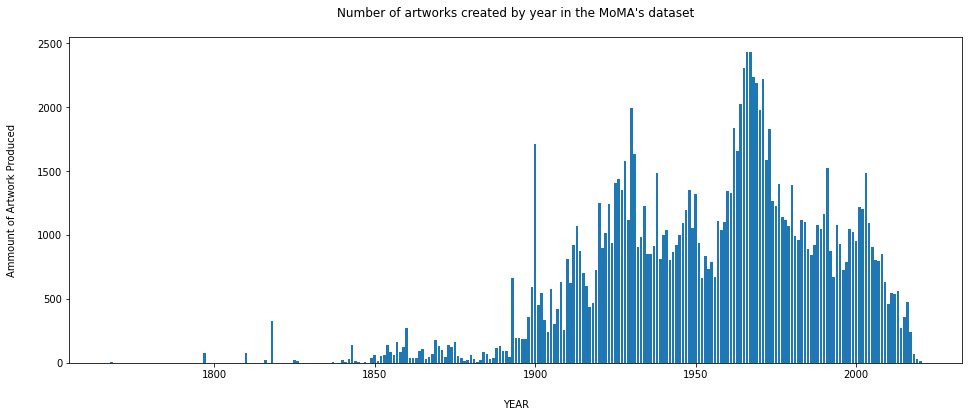

In [857]:
query = """
WITH cte AS (SELECT date, substring(date, '(\d+)(.*)')::integer as result
from artworks)

SELECT result, COUNT(*)
FROM cte
GROUP BY result
ORDER BY COUNT(*) DESC
"""

df = sqlio.read_sql_query(query, conn)
data = df.sort_values('result')[33:-1]

plt.figure(figsize=(16,6))
plt.bar(data['result'], data['count'])
plt.xlabel('YEAR', labelpad=20)
plt.ylabel('Ammount of Artwork Produced', labelpad=20)
plt.title('Number of artworks created by year in the MoMA\'s dataset', pad=20)
plt.show()

**End of question 29** Here we start seeing interesting patterns that could be good to analyze like the increase in artworks from the 60s-70s or what happened in the year 1900 for that sudden spike, etc.

<br>
<font color='blue'>Question 30: Let's say a man comes to you as MoMA's analyst and tells you he wants to know about a random artist who was born the same date as him. He tells you he was born in 1965. Choose a random artist and return all of his/her artwork. Return a table with the works, the name of the person and the date they were born </font>

In [883]:
query = """
SELECT title, displayname, begindate
FROM artists
INNER JOIN artworks_edit ON artworks_edit.artistID = artists.constituentid
WHERE artistid IN (SELECT constituentid 
                    FROM artists
                    WHERE begindate = 1965
                    ORDER BY random()
                    LIMIT 1)
"""

df = sqlio.read_sql_query(query, conn)
df


,title,displayname,begindate
0,Vase,Konstantin Grcic,1965
1,Miura Stackable Stools,Konstantin Grcic,1965
2,MYTO chair,Konstantin Grcic,1965
3,360° Chair,Konstantin Grcic,1965
4,360° Stool,Konstantin Grcic,1965
5,Miura Stackable Stools,Konstantin Grcic,1965
6,Miura Stackable Stools,Konstantin Grcic,1965
7,Miura Stackable Stools,Konstantin Grcic,1965
8,Trolley for Miura Stackable Stools,Konstantin Grcic,1965
9,Miura Stackable Stools,Konstantin Grcic,1965


<br>
<font color='blue'>Question 31: Compute the number of artworks for each artist. Then return three columns: 1) the nationality, 2) the average number of artworks by each nationality, and 3) amount of artists in each nationality.  </font>

In [961]:
query = """

WITH cte AS (SELECT artistid, COUNT(*) as num_artworks
from artworks_edit
GROUP BY artistid
ORDER BY num_artworks DESC)

SELECT DISTINCT(nationality), 
        AVG(num_artworks) OVER(PARTITION BY nationality) AS average_by_nationality, 
        COUNT(artistid) OVER(PARTITION BY nationality) AS count
FROM artists
INNER JOIN cte ON artists.constituentid = cte.artistid
ORDER BY average_by_nationality DESC
LIMIT 10
"""

df = sqlio.read_sql_query(query, conn)
df

,nationality,average_by_nationality,count
0,Ivorian,483.000000,1
1,Sudanese,51.000000,1
2,Latvian,41.000000,2
3,Costa Rican,32.000000,2
4,French,28.696323,843
5,Burkinabe,26.000000,1
6,Spanish,20.218750,160
7,Belgian,16.835165,91
8,Portuguese,15.454545,11
9,Hungarian,15.074074,54


We can see that the nationality with more artworks per artist is la Côte d'Ivoire, this is because there is only one artist (Frédéric Bruly Bouabré) who has done a lot of works that have been recorded in the MoMA's database. 

>  <img src="img/Frédéric Bruly Bouabré.jpeg" style="width: 400px;"/>
<br>
> <b>Frédéric Bruly Bouabré (Drawing)</b> / source: Artsy

***
# IMPORTANT: Close the connection

<div class="span5 alert alert-danger">
    You need to close the connection to you database with <b>conn.close()</b>
</div>

In [981]:
conn.close()

***
<br>

### Additional Queries

Other topics to continue practising on in the future ([check manual](https://www.postgresql.org/docs/13/sql-keywords-appendix.html)). 
- Functions: CREATE OR REPLACE FUNCTION, DECLARE, BEGIN, END
- ROLL UP
- More JOINS: OUTER, LEFT, RIGHT, UNION, INTERSECT
- EXCEPT
- ANY / ALL
- CAST
- Aggregate functions for statistics: std, mode, percentile, variance,...)
- Dense Rank / Percent Rank
- etc.

In [143]:
# Not finished
query = """
SELECT artistbio, nationality, begindate, enddate, gender
FROM artworks
LIMIT 5
"""

df = sqlio.read_sql_query(query, conn)
df

query = """
CREATE OR REPLACE FUNCTION remove_paretheses(column CHARACTER VARYING)
 RETURNS column AS
DECLARE
    input_string column := $1;
BEGIN
    input_string := translate(input_string, '(', '');
    input_string := translate(input_string, ')', '');
RETURN input_string;
END;
language plpgsql;
"""

df = sqlio.read_sql_query(query, conn)
df

<br>

**Extra** Filter out the artists who do not have a begindate or enddate, then get the difference between deaths and births and add the resulting figure to give a total of the combined number of years lived by the artists in the dataset.

In [980]:
query = """
SELECT SUM (enddate - begindate) AS years_lived
FROM artists 
WHERE begindate != 0 AND enddate != 0
"""

df = sqlio.read_sql_query(query, conn)
df

,years_lived
0,365563
